<a href="https://colab.research.google.com/github/JhayCodee/AMC-LAB1/blob/master/BrainTumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este dataset contiene imágenes de resonancia magnética (MRI) de tumores cerebrales, categorizadas en cuatro clases

**pituitary_tumor**: Imágenes de tumores de la glándula pituitaria.

**meningioma_tumor**: Imágenes de meningiomas, que son tumores en las membranas que rodean el cerebro y la médula espinal.

**glioma_tumor**: Imágenes de gliomas, que son tumores que se originan en las células gliales del cerebro.

**normal**: Imágenes de cerebros sin tumores.

Configurar las rutas del dataset

In [1]:
dataset_path = '/content/drive/MyDrive/braintumor/Data'

Preparar los datos

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de datos con rescale y dividir en entrenamiento y validación
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Crear el generador de entrenamiento
train_generator = train_datagen.flow_from_directory(
    dataset_path,              # Ruta al dataset
    target_size=(256, 256),    # Tamaño de las imágenes
    batch_size=32,             # Tamaño del batch
    class_mode='categorical',  # Modo de las etiquetas
    subset='training'          # Subconjunto de entrenamiento
)

# Crear el generador de validación
validation_generator = train_datagen.flow_from_directory(
    dataset_path,              # Ruta al dataset
    target_size=(256, 256),    # Tamaño de las imágenes
    batch_size=32,             # Tamaño del batch
    class_mode='categorical',  # Modo de las etiquetas
    subset='validation'        # Subconjunto de validación
)


Found 2479 images belonging to 4 classes.
Found 617 images belonging to 4 classes.


Definir el modelo CNN

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Definir la arquitectura del modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 clases: pituitary, meningioma, glioma, normal
])


Compilar el modelo

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Entrenar el modelo

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Entrenar el modelo con Early Stopping
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/10
78/78 - 605s - loss: 1.4075 - accuracy: 0.5099 - val_loss: 0.9471 - val_accuracy: 0.6126 - 605s/epoch - 8s/step
Epoch 2/10
78/78 - 327s - loss: 0.5313 - accuracy: 0.8048 - val_loss: 0.8309 - val_accuracy: 0.6515 - 327s/epoch - 4s/step
Epoch 3/10
78/78 - 337s - loss: 0.1644 - accuracy: 0.9463 - val_loss: 0.9614 - val_accuracy: 0.7618 - 337s/epoch - 4s/step
Epoch 4/10
78/78 - 349s - loss: 0.0439 - accuracy: 0.9875 - val_loss: 1.1340 - val_accuracy: 0.7310 - 349s/epoch - 4s/step
Epoch 5/10
78/78 - 353s - loss: 0.0111 - accuracy: 0.9984 - val_loss: 1.3925 - val_accuracy: 0.7439 - 353s/epoch - 5s/step


Evaluar el modelo

In [6]:
loss, accuracy = model.evaluate(validation_generator, verbose=0)
print(f'Validation accuracy: {accuracy:.2f}%')

Validation accuracy: 0.74%


Crear un formulario de carga de imágenes y realizar predicciones

Saving N_58.jpg to N_58.jpg
1/1 [==============================] - 0s 62ms/step


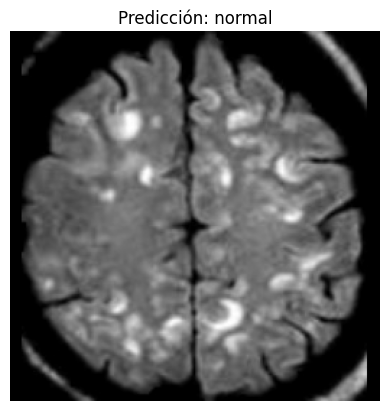

In [9]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Subir una imagen
uploaded = files.upload()

for fn in uploaded.keys():
    # Preprocesar la imagen
    path = fn
    img = load_img(path, target_size=(256, 256))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Realizar la predicción
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Mapear la clase predicha a la etiqueta correspondiente
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    predicted_label = class_labels[predicted_class]

    # Mostrar la imagen y la predicción
    plt.imshow(img)
    plt.title(f'Predicción: {predicted_label}')
    plt.axis('off')
    plt.show()
